# Código Base para o Trabalho Final de Sistemas Lineares I

Este código foi desenvolvido para ser uma referência para os alunos para construirem seus trabalhos

## Carga de Bibliotecas

In [1]:
import numpy as np
from scipy import signal as signal
from scipy.signal import lsim, impulse, step
import matplotlib.pyplot as plt

## Definição de uma função de transferência

Repare que o formato de definição é signal.TransferFunction(numerador,denominador)   
Sendo que o numerador e o denominado seguem uma regra de formação simples.    
A posição no vetor define o grau de multiplicação no operador de Laplace

In [2]:
sys = signal.TransferFunction([20, 2000, 0],[1, 12, 20])
sys

TransferFunctionContinuous(
array([  20., 2000.,    0.]),
array([ 1., 12., 20.]),
dt: None
)

A código acima gera a função de transferência $H(s) = \frac{20s^2+2000s}{s^2+12s+20}$

In [3]:
sys = signal.TransferFunction([1],[1, 1])
sys

TransferFunctionContinuous(
array([1.]),
array([1., 1.]),
dt: None
)

A código acima gera a função de transferência $H(s) = \frac{1}{s+1}$

## Simular a passagem de um sinal por um sistema   
Vamos agora simular um sinal cossenoidal sendo apresentado ao sistema e a avaliação da sua saída

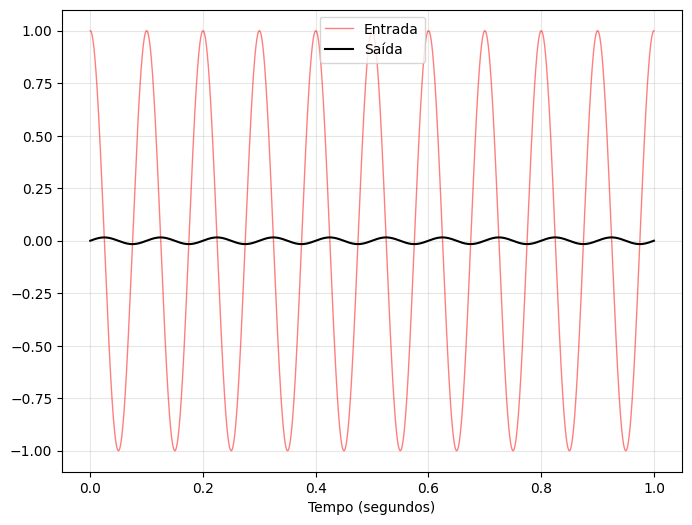

In [4]:
n_samples = 10000
t = np.linspace(0, 1, n_samples, endpoint=False) # tempo de simulação de 0 a 10 segundos com 100 pontos de amostragem
input_signal = np.cos(2*np.pi*10*t)
tout, output_signal, xout = lsim(sys, U=input_signal, T=t) # simulação realizada sem problemas

# vamos para a plotagem do sinal
plt.figure(figsize=(8,6))
plt.plot(t, input_signal, 'r', alpha=0.5, linewidth=1, label='Entrada')
plt.plot(t, output_signal, 'k', linewidth=1.5, label='Saída')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.xlabel('Amplitude')
plt.xlabel('Tempo (segundos)')
plt.show()

Podemos que ver que o sinal foi atenuado. Uma recomendação é que façamos a medida de atenuação do sinal de entrada.

In [5]:
atenuacao = np.max(output_signal)/np.max(input_signal)
print('A atenuação entre o sinal de entrada e saida é de', 20*np.log10(atenuacao), 'dB')

A atenuação entre o sinal de entrada e saida é de -36.01976340600235 dB


In [6]:
defasagem = (np.argmax(np.round(output_signal,2),axis=0)-np.argmax(np.round(input_signal,2),axis=0))/n_samples
print('A defasagem entre o sinal de entrada e o sinal de saida é de', defasagem, 'segundos')

A defasagem entre o sinal de entrada e o sinal de saida é de 0.0202 segundos


## Simular a passagem de um sinal por um sistema com C.I. 
Repare que agora vamos dar uma condição inicial para o sistema

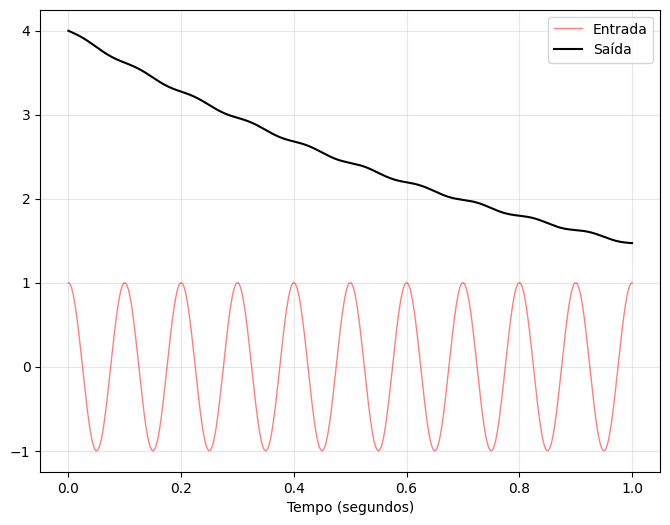

In [7]:
n_samples = 10000
t = np.linspace(0, 1, n_samples, endpoint=False) # tempo de simulação de 0 a 10 segundos com 100 pontos de amostragem
input_signal = np.cos(2*np.pi*10*t)
tout, output_signal, xout = lsim(sys, U=input_signal, T=t, X0=[4]) # simulação realizada sem problemas

# vamos para a plotagem do sinal
plt.figure(figsize=(8,6))
plt.plot(t, input_signal, 'r', alpha=0.5, linewidth=1, label='Entrada')
plt.plot(t, output_signal, 'k', linewidth=1.5, label='Saída')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.xlabel('Amplitude')
plt.xlabel('Tempo (segundos)')
plt.show()

## Fazer o Diagrama de Bode

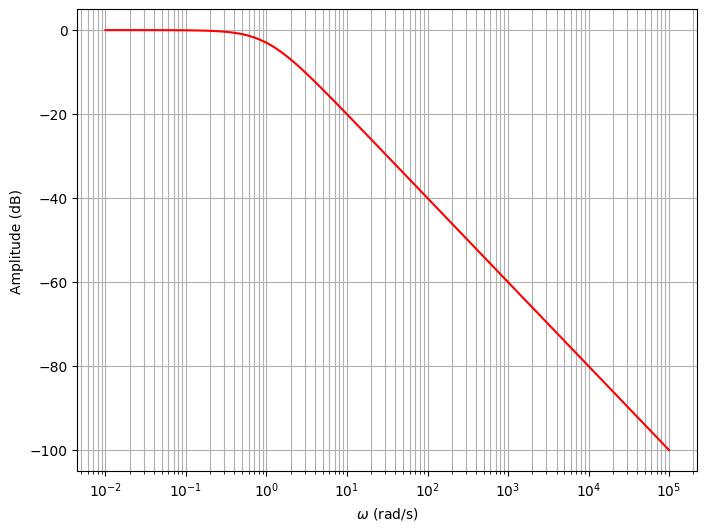

In [8]:
w = np.logspace(-2,5,num=100, base=10.0)
w, mag, phase = signal.bode(sys,w=w,n=200)

plt.figure(figsize=(8,6))
plt.semilogx(w,mag, 'r')
plt.grid(True, which="both", ls="-")
plt.xlabel('$\omega$ (rad/s)');
plt.ylabel('Amplitude (dB)');
#plt.semilogx(w[(w>0.95) & (w< 1.05)],mag[(w>0.95) & (w< 1.05)],'ko')
plt.show()

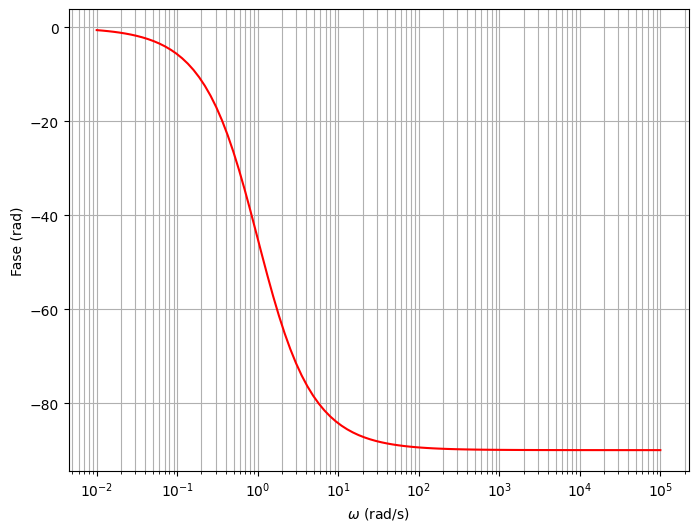

In [9]:
w = np.logspace(-2,5,num=100, base=10.0)
w, mag, phase = signal.bode(sys,w=w,n=200)

plt.figure(figsize=(8,6))
plt.semilogx(w,phase, 'r')
plt.grid(True, which="both", ls="-")
plt.xlabel('$\omega$ (rad/s)');
plt.ylabel('Fase (rad)');
#plt.semilogx(w[(w>0.95) & (w< 1.05)],phase[(w>0.95) & (w< 1.05)],'ko')
plt.show()

## Simulação de sinais

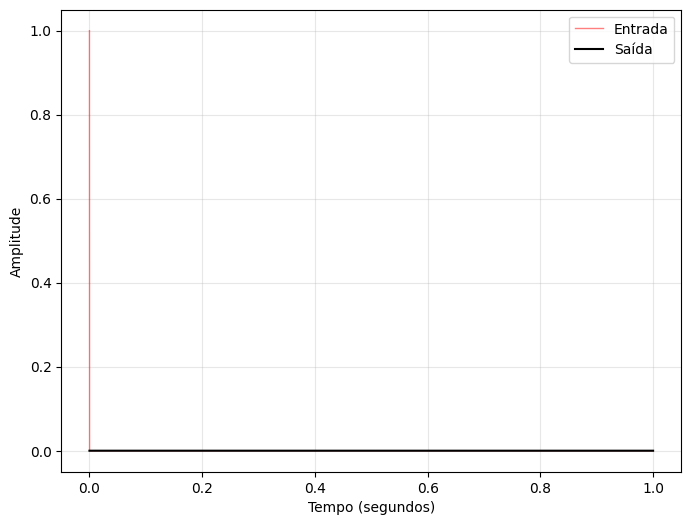

In [10]:
n_samples = 10000
t = np.linspace(0, 1, n_samples, endpoint=False) # tempo de simulação de 0 a 10 segundos com 100 pontos de amostragem
input_signal = np.zeros_like(t)
input_signal[0] = 1

tout, output_signal, xout = lsim(sys, U=input_signal, T=t) # simulação realizada sem problemas

# vamos para a plotagem do sinal
plt.figure(figsize=(8,6))
plt.plot(t, input_signal, 'r', alpha=0.5, linewidth=1, label='Entrada')
plt.plot(t, output_signal, 'k', linewidth=1.5, label='Saída')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.ylabel('Amplitude')
plt.xlabel('Tempo (segundos)')
plt.show()

Este plot não representa a resposta impulsiva do sistema, precisamos melhorar isso!

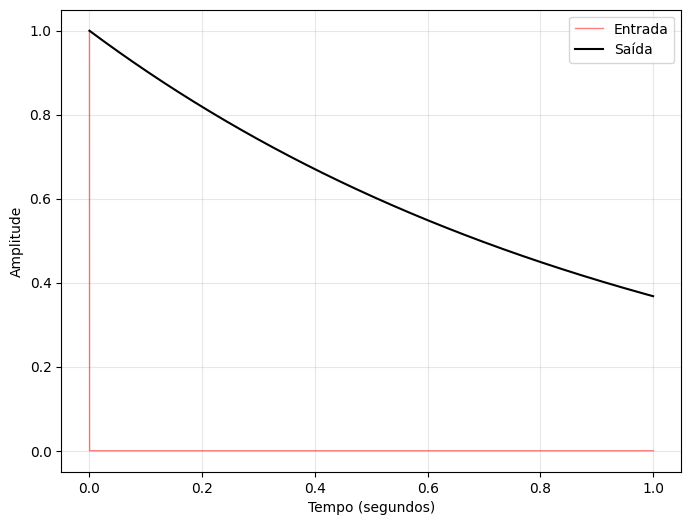

In [11]:
n_samples = 10000
t = np.linspace(0, 1, n_samples, endpoint=False) # tempo de simulação de 0 a 1 segundos com 100 pontos de amostragem
input_signal = np.zeros_like(t)
input_signal[0] = 1

tout, output_signal = impulse(sys,T=t) # simulação realizada sem problemas

# vamos para a plotagem do sinal
plt.figure(figsize=(8,6))
plt.plot(t, input_signal, 'r', alpha=0.5, linewidth=1, label='Entrada')
plt.plot(t, output_signal, 'k', linewidth=1.5, label='Saída')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.ylabel('Amplitude')
plt.xlabel('Tempo (segundos)')
plt.show()

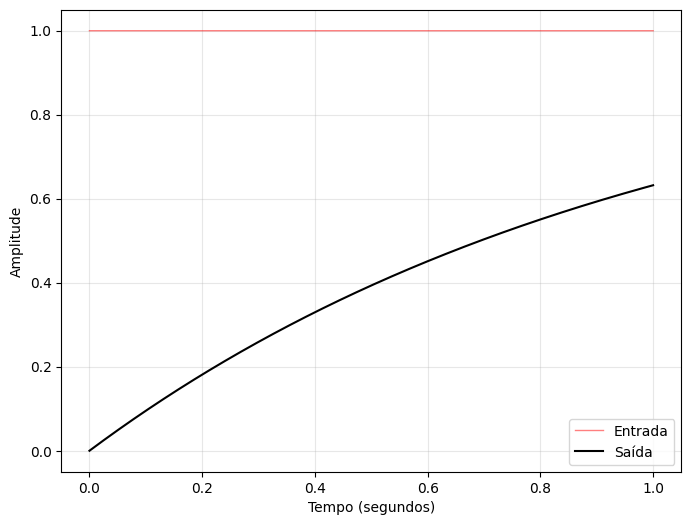

In [12]:
n_samples = 10000
t = np.linspace(0, 1, n_samples, endpoint=False) # tempo de simulação de 0 a 1 segundos com 100 pontos de amostragem
input_signal = np.ones_like(t)
input_signal[0] = 1

tout, output_signal = step(sys,T=t) # simulação realizada sem problemas

# vamos para a plotagem do sinal
plt.figure(figsize=(8,6))
plt.plot(t, input_signal, 'r', alpha=0.5, linewidth=1, label='Entrada')
plt.plot(t, output_signal, 'k', linewidth=1.5, label='Saída')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.ylabel('Amplitude')
plt.xlabel('Tempo (segundos)')
plt.show()

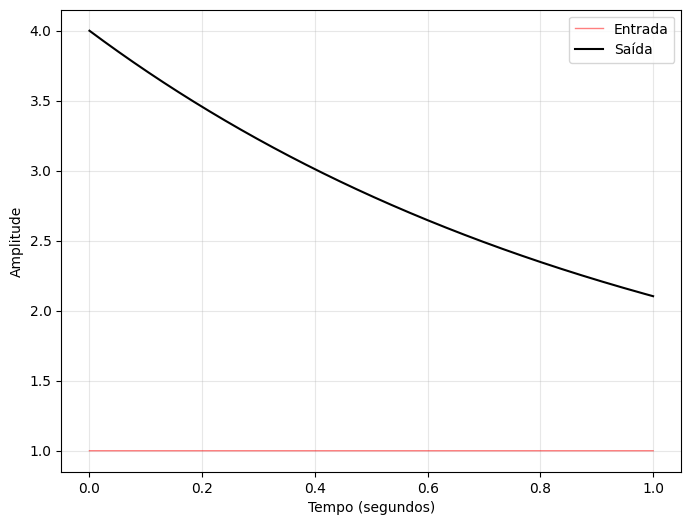

In [13]:
n_samples = 10000
t = np.linspace(0, 1, n_samples, endpoint=False) # tempo de simulação de 0 a 1 segundos com 100 pontos de amostragem
input_signal = np.ones_like(t)
input_signal[0] = 1

tout, output_signal = step(sys,T=t, X0=[4]) # simulação realizada sem problemas

# vamos para a plotagem do sinal
plt.figure(figsize=(8,6))
plt.plot(t, input_signal, 'r', alpha=0.5, linewidth=1, label='Entrada')
plt.plot(t, output_signal, 'k', linewidth=1.5, label='Saída')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.ylabel('Amplitude')
plt.xlabel('Tempo (segundos)')
plt.show()